# Import

In [1]:
%load_ext nb_black
import cooler
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [2]:
from topology_loop_caller.plotting import plot_hic_matrix_fragment, genomic_dist_interaction_freq_plot
from topology_loop_caller.distance_transform import negative_log_transformation, pearson_distance

<IPython.core.display.Javascript object>

# Load data

In [3]:
c = cooler.Cooler("../data/data_new/8B_2000_down.cool")
nonbal = c.matrix(balance=False)[:, :]
bal = c.matrix(balance=True)[:, :]

<IPython.core.display.Javascript object>

In [4]:
bal.shape

(17174, 17174)

<IPython.core.display.Javascript object>

In [11]:
(np.ceil(c.chromsizes/c.binsize).astype(int))

name
chr1     2462
chr2     4243
chr3     3179
chr4     2726
chr5     2563
chr6     1802
chrM       28
chrR       43
chr2F      81
chr3F       9
chrBF      38
Name: length, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
test = np.logical_not(np.isnan(bal).all(axis=1))

<IPython.core.display.Javascript object>

In [23]:
test.shape

(17174,)

<IPython.core.display.Javascript object>

In [24]:
bal.shape

(17174, 17174)

<IPython.core.display.Javascript object>

In [28]:
chr_one_bal = bal[0:2462, :][:, 0:2462]
chr_one_bal.shape

(2462, 2462)

<IPython.core.display.Javascript object>

In [39]:
pearson_distance(no_nan_chr_one_bal[1000:1500, :][:, 1000:1500])

array([[0.00000000e+00, 1.58436288e-01, 2.69989432e-01, ...,
        1.01052300e+00, 1.01430792e+00, 1.01743674e+00],
       [1.58436288e-01, 0.00000000e+00, 2.21186444e-01, ...,
        1.00826246e+00, 1.01106877e+00, 1.01388686e+00],
       [2.69989432e-01, 2.21186444e-01, 0.00000000e+00, ...,
        1.01122459e+00, 1.01285305e+00, 1.01838508e+00],
       ...,
       [1.01052300e+00, 1.00826246e+00, 1.01122459e+00, ...,
        2.22044605e-16, 4.49463149e-01, 7.14689603e-01],
       [1.01430792e+00, 1.01106877e+00, 1.01285305e+00, ...,
        4.49463149e-01, 1.11022302e-16, 3.41456788e-01],
       [1.01743674e+00, 1.01388686e+00, 1.01838508e+00, ...,
        7.14689603e-01, 3.41456788e-01, 0.00000000e+00]])

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Nonbalanced heatmap Fragment'}>

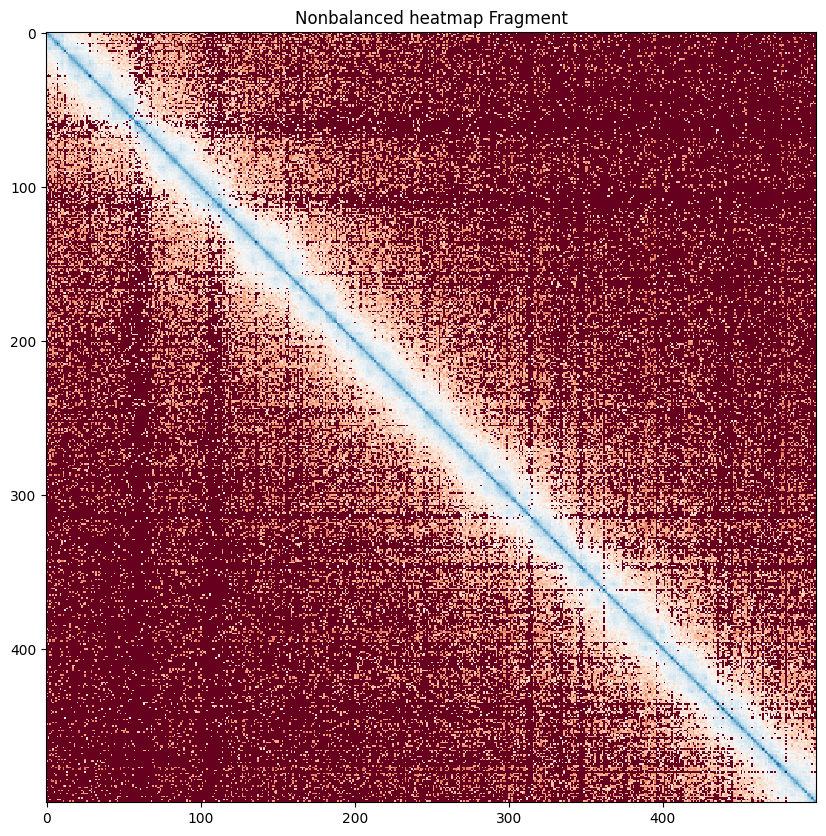

<IPython.core.display.Javascript object>

In [36]:
plot_hic_matrix_fragment(
    no_nan_chr_one_bal, (1000, 1000, 500), figsize=(10, 10),     lop1p_add=1e-5,
plot_title="Nonbalanced heatmap Fragment"
)

In [40]:
np.save('../data/8B_test_fragment.npy', pearson_distance(no_nan_chr_one_bal[1000:1500, :][:, 1000:1500]))


<IPython.core.display.Javascript object>

In [6]:
bal.dtype

dtype('float64')

<IPython.core.display.Javascript object>

# Hi-C matrix visualisation


<AxesSubplot:title={'center':'Nonbalanced heatmap Fragment'}>

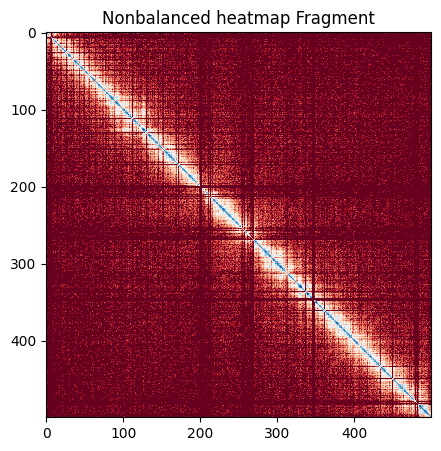

<IPython.core.display.Javascript object>

In [7]:
plot_hic_matrix_fragment(
    nonbal, (1000, 1000, 500), figsize=(5, 5), plot_title="Nonbalanced heatmap Fragment"
)

<AxesSubplot:title={'center':'Balanced heatmap Fragment'}>

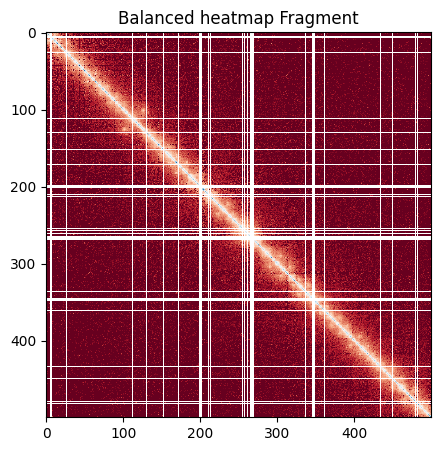

<IPython.core.display.Javascript object>

In [8]:
plot_hic_matrix_fragment(
    bal,
    (1000, 1000, 500),
    lop1p_add=1e-3,
    figsize=(5, 5),
    plot_title="Balanced heatmap Fragment",
)

<AxesSubplot:title={'center':'Balanced heatmap'}>

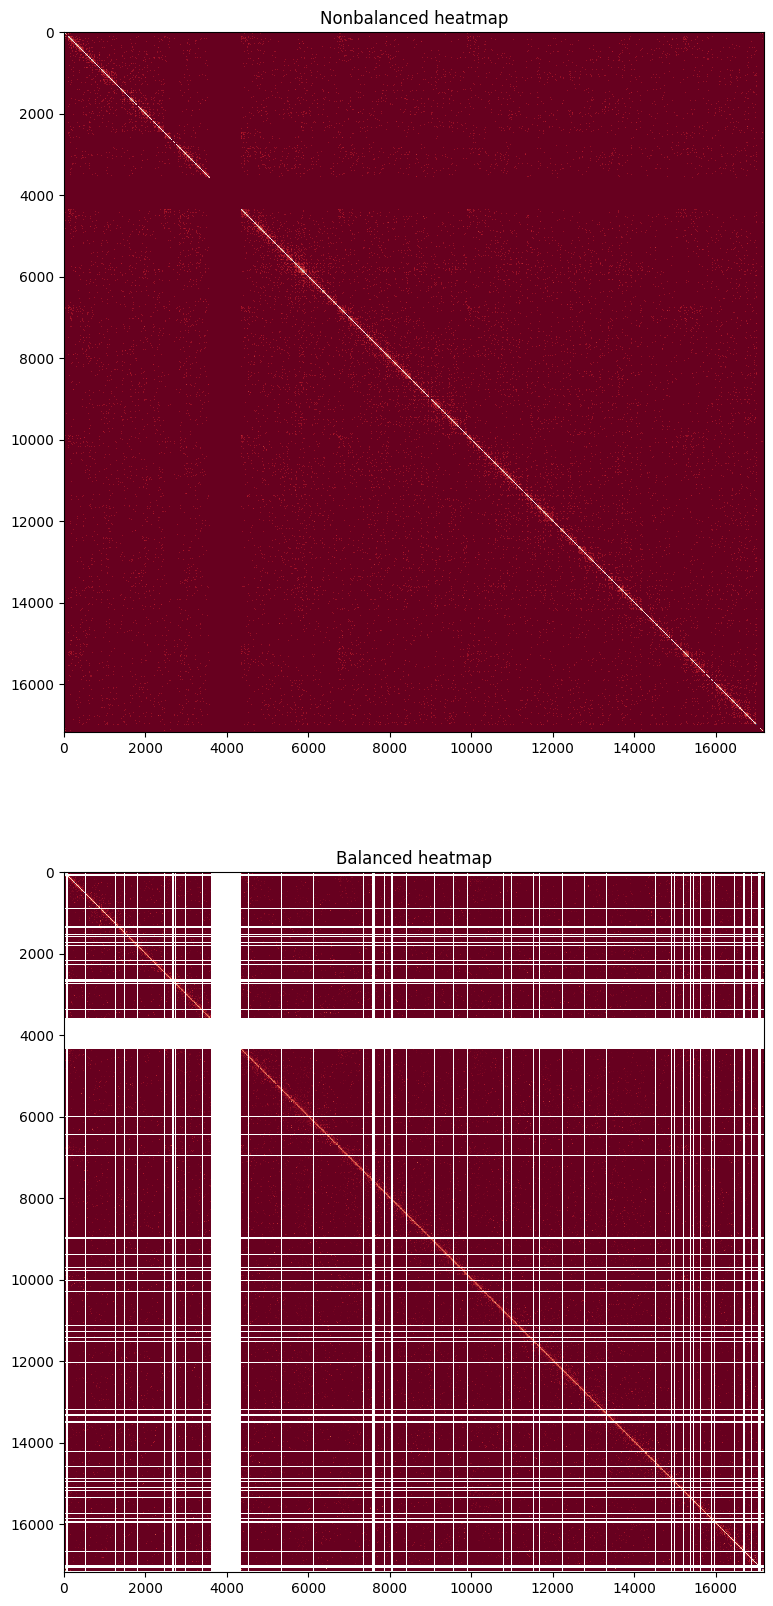

<IPython.core.display.Javascript object>

In [9]:
fig, axs = plt.subplots(2, figsize = (10, 20))
plot_hic_matrix_fragment(
    nonbal, subset=None, ax=axs[0],
    plot_title="Nonbalanced heatmap",
)
plot_hic_matrix_fragment(
    bal,  subset=None, ax=axs[1],
    lop1p_add=1e-3,
    plot_title="Balanced heatmap",
)


We see a lot of rows, that became NaNs, due to the part of cooler normalization procedure - blacklisting:<br> --min-nnz (Ignore bins from the contact matrix whose marginal number of nonzeros is less than this number. [default: 10])<br>
So we have to take it into account later.

<AxesSubplot:>

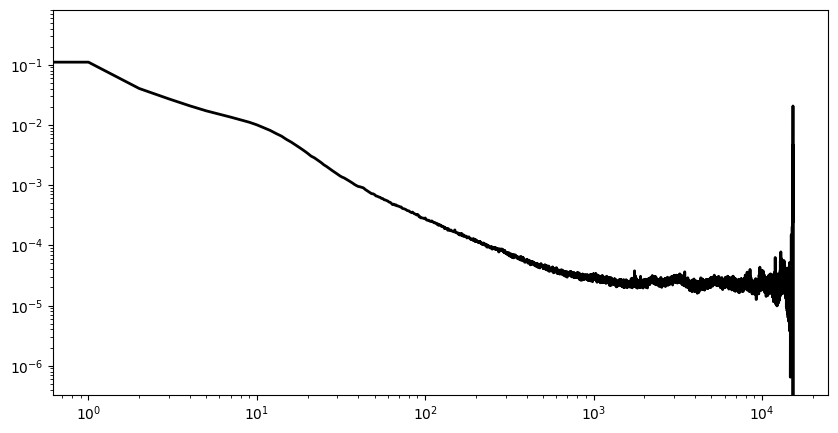

<IPython.core.display.Javascript object>

In [11]:
genomic_dist_interaction_freq_plot(bal, figsize=(10,5), color='black')

# Contact map to distance matrix

We have to remember, that our function does not output Euclidian distances per se, because the obtained distances won't obey triangle inequality (|a| + |b| ≥ |a + b|). But our output is useful for subsequent Topological Data Analysis and could be seen as some kind of similarity function, therefore in the following sections we will still use the term "Distance" for the description of that output.

## prev. iteration

In [13]:
log_dist_matrix = negative_log_transformation(bal)

<IPython.core.display.Javascript object>

## current iteration

In [14]:
pearson_dist_matrix = pearson_distance(bal)

<IPython.core.display.Javascript object>

## testing

In [15]:
print(log_dist_matrix.min(), log_dist_matrix.max())
print(pearson_dist_matrix.min(), pearson_dist_matrix.max())

0.0 0.9999714500665798
0.0 1.005803321868433


<IPython.core.display.Javascript object>

In [24]:
ind = np.isnan(bal).all(axis=1)
no_nan_matrix = bal[~ind][:, ~ind]

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Distance Map Fragment'}>

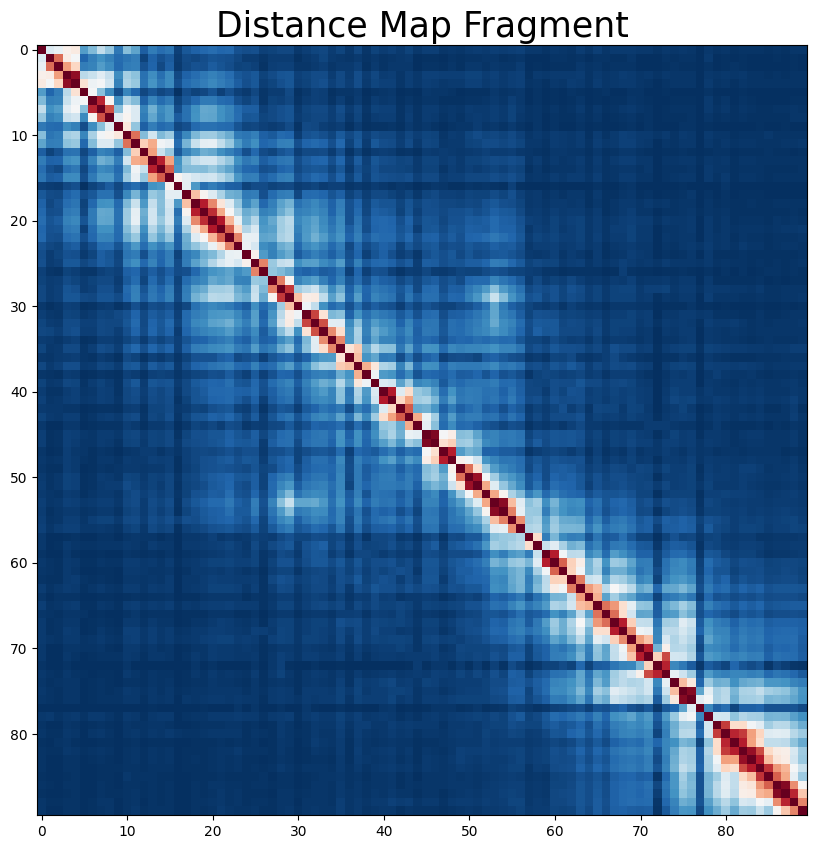

<IPython.core.display.Javascript object>

In [20]:
plot_hic_matrix_fragment(
    pearson_dist_matrix, (935, 935, 90), figsize=(10, 10), log_scaled=False,plot_title="Distance Map Fragment", title_fontsize=25
)

<AxesSubplot:title={'center':'Contact Map Fragment, log scale'}>

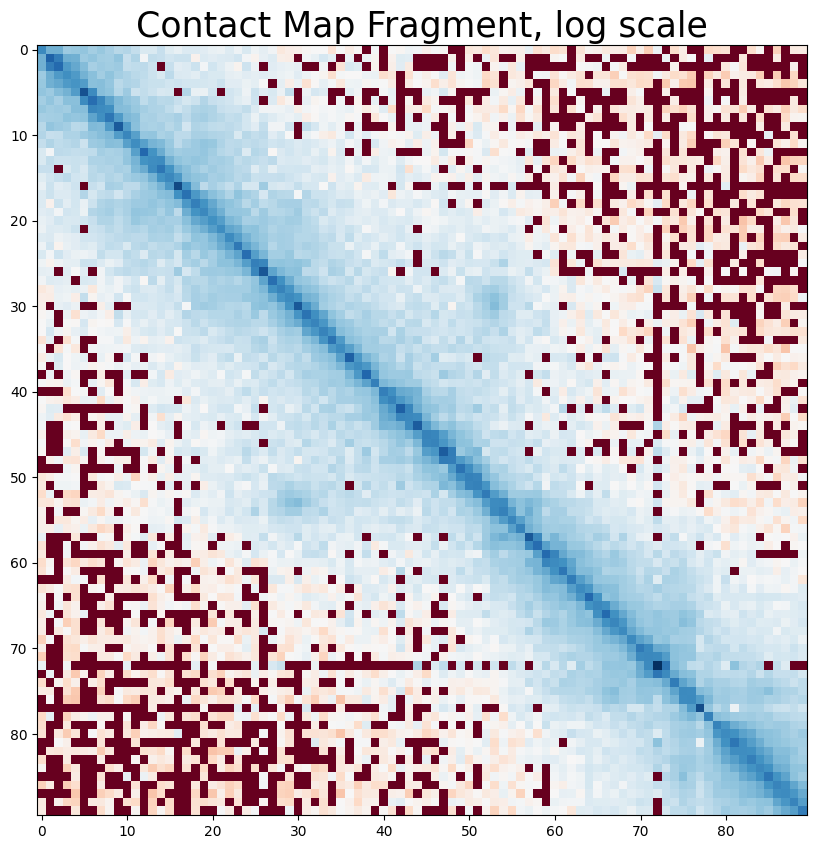

<IPython.core.display.Javascript object>

In [25]:
plot_hic_matrix_fragment(
    no_nan_matrix, (935, 935, 90), figsize=(10, 10), log_scaled=True,lop1p_add=1e-6,plot_title="Contact Map Fragment, log scale", title_fontsize=25)

Text(0.5, 1.0, 'Distance Map Fragment, cur. iteration')

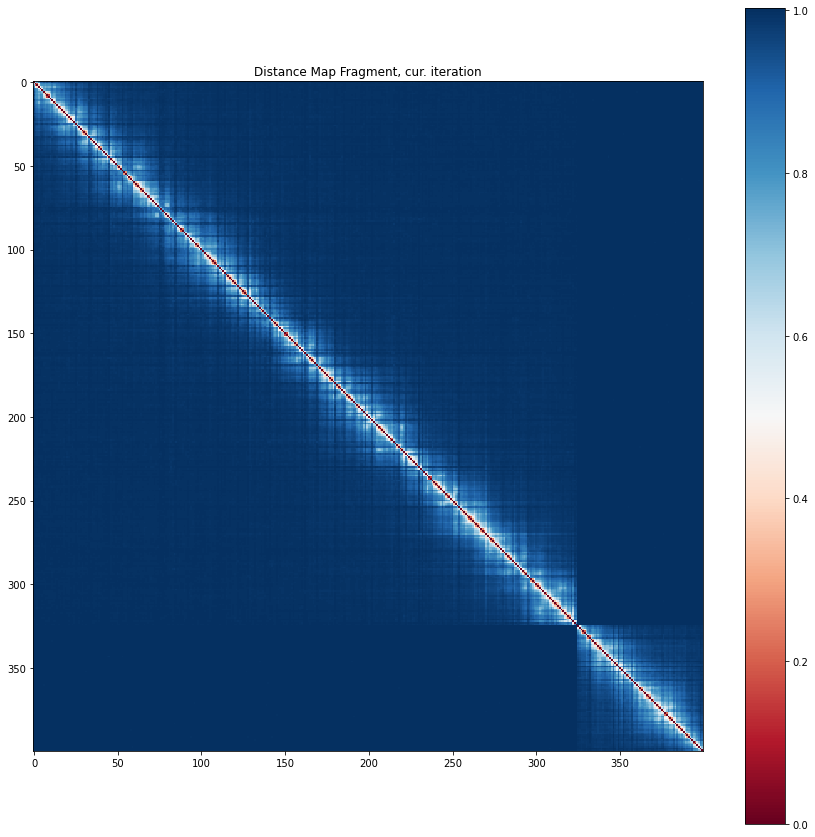

In [27]:
plt.figure(figsize = (15, 15))
plt.imshow(euc[1900:2300, 1900:2300], cmap='RdBu', interpolation='none')
plt.colorbar()
plt.title("Distance Map Fragment, cur. iteration")

Text(0.5, 1.0, 'Distance Map Fragment, cur. iteration')

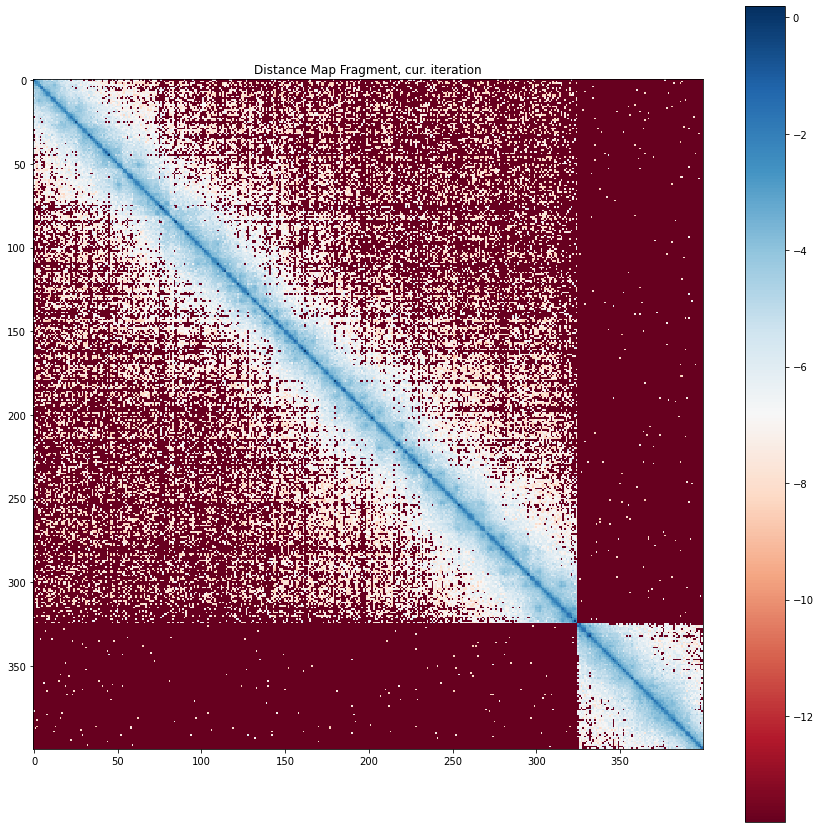

In [22]:
plt.figure(figsize = (15, 15))
plt.imshow(np.log(z+1e-6)[1900:2300, 1900:2300], cmap='RdBu', interpolation='none')
plt.colorbar()
plt.title("Distance Map Fragment, cur. iteration")

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Distance'),
 Text(0.5, 1.0, 'The observed distribution of distances != 1')]

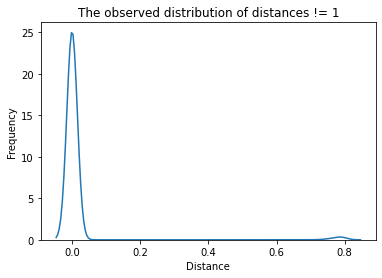

In [182]:
sns.kdeplot(result[result < 0.8].flatten(), alpha=.5).set(title="The observed distribution of distances != 1", xlabel='Distance', ylabel='Frequency')

Most of the values in the distance matrix = 1, because all of them come from the cells = 0 or NaN from contact map. Let's see the distribution of all the values != 0:

In [ ]:
X = euc.flatten()

In [26]:
y = X[X < 1.0]

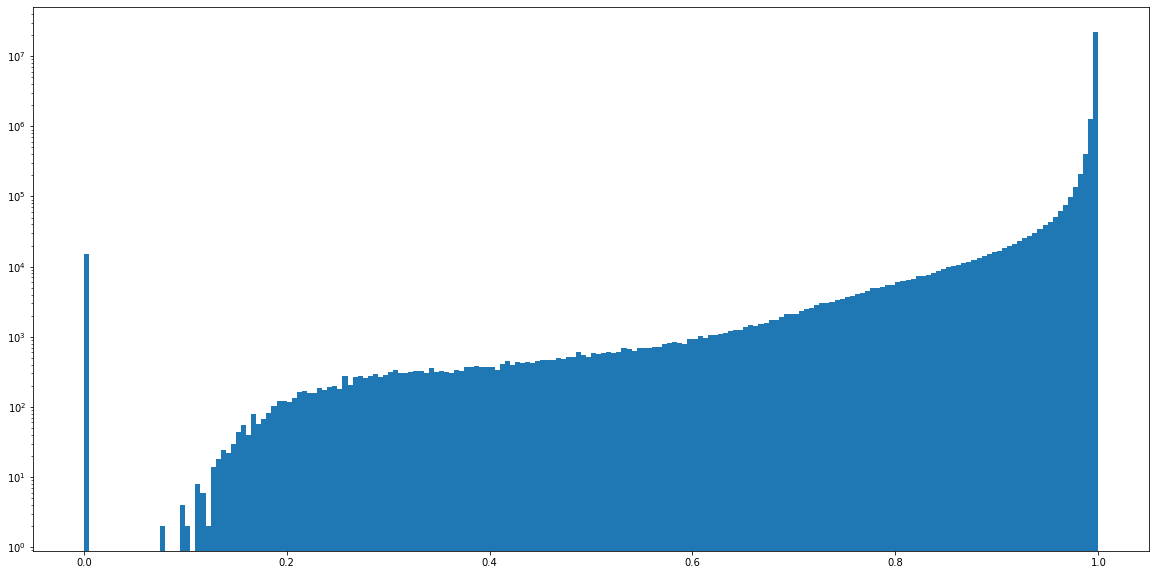

In [28]:
plt.figure(figsize = (20, 10))
plt.hist(y, bins = 200)
plt.yscale('log')
#plt.title()
#sns.kdeplot(y, alpha=.5).set(title="The observed distribution of distances != 1", xlabel='Distance', ylabel='Frequency')

Text(0.5, 1.0, 'The observed distribution of distances != 1')

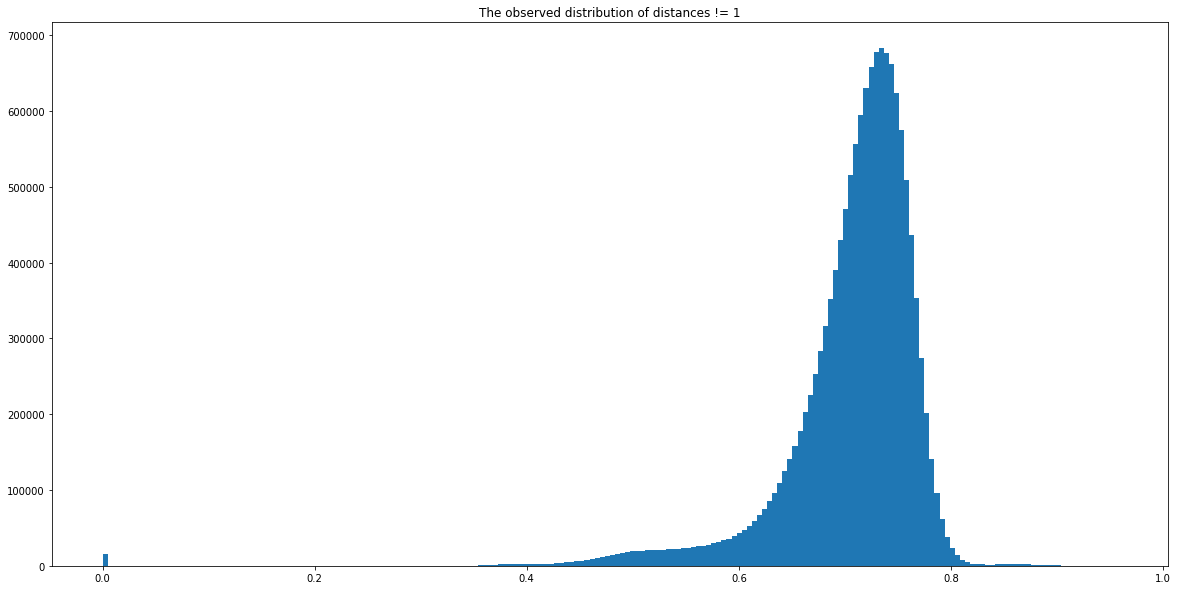

In [14]:
c = cooler.Cooler("/home/a.kuznetsov/data_new/0A_2000_down.cool")
bal = c.matrix(balance=True)[:, :]
X = np.logical_not(np.isnan(bal).all(axis=1))
test = mydist_balanced((bal[X, :][:, X]))
Z = test.flatten()
plt.figure(figsize = (20, 10))
plt.hist(Z[Z != 1.0], bins = 200)
plt.title("The observed distribution of distances != 1")

#Here I just checked that NaN bins deletion wouldn't change the resulted distribution.

In [49]:
from sklearn.utils.validation import check_symmetric
check_symmetric(Z, tol=1e-20)

array([[0.00000000e+00, 3.71852179e-01, 5.33651515e-01, ...,
        9.95865860e-01, 9.96037500e-01, 9.94374568e-01],
       [3.71852179e-01, 0.00000000e+00, 3.73940420e-01, ...,
        9.95349401e-01, 9.57720180e-01, 9.72377645e-01],
       [5.33651515e-01, 3.73940420e-01, 1.05367121e-08, ...,
        9.96011830e-01, 9.97404848e-01, 9.92803947e-01],
       ...,
       [9.95865860e-01, 9.95349401e-01, 9.96011830e-01, ...,
        0.00000000e+00, 1.00000685e+00, 9.98670701e-01],
       [9.96037500e-01, 9.57720180e-01, 9.97404848e-01, ...,
        1.00000685e+00, 1.05367121e-08, 5.61892199e-01],
       [9.94374568e-01, 9.72377645e-01, 9.92803947e-01, ...,
        9.98670701e-01, 5.61892199e-01, 0.00000000e+00]])

We are mostly interested in the distances < 0.5 because of our maxrad = 0.5 parameter in the Eirene command.

## Data Processing.

In [64]:
import os
[x.split('_')[0] for x in os.listdir("../data/data_new")]

['0A', '0B', '2A', '2B', '5A', '5B', '8A', '8B']

<IPython.core.display.Javascript object>

In [28]:
Files = ["0A", "0B", "2A", "2B", "5A", "5B", "8A", "8B"]

In [53]:
for name in Files:
    c = cooler.Cooler("../data/data_new/"+name+"_2000_down.cool")
    bal = c.matrix(balance=True)[:, :]
    X = np.logical_not(np.isnan(bal).all(axis=1)) #We dicided to delete all the NaN values from the analysis
                                                    #due to their uninformativeness
    Deleted = np.arange(bal.shape[0])[~X] #Indices of deleted bins
    Saved = np.arange(bal.shape[0])[X] #Indices of saved bins
    np.save('/gss/home/a.kuznetsov/DM_indices/'+name+'_saved.npy', Saved)
    print(name+'_saved.npy is saved')
    np.save('/gss/home/a.kuznetsov/DM_indices/'+name+'_deleted.npy', Deleted)
    print (name+'_deleted.npy is saved')
    np.save('/gss/home/a.kuznetsov/NoNAN_DM_new/'+name+'.npy', p_dist((bal[X, :][:, X]))) #Distance matrix of non-NaN bins
    print (name+'.npy is saved')

0A_saved.npy is saved
0A_deleted.npy is saved
0A.npy is saved
0B_saved.npy is saved
0B_deleted.npy is saved
0B.npy is saved
2A_saved.npy is saved
2A_deleted.npy is saved
2A.npy is saved
2B_saved.npy is saved
2B_deleted.npy is saved
2B.npy is saved
5A_saved.npy is saved
5A_deleted.npy is saved
5A.npy is saved
5B_saved.npy is saved
5B_deleted.npy is saved
5B.npy is saved
8A_saved.npy is saved
8A_deleted.npy is saved
8A.npy is saved
8B_saved.npy is saved
8B_deleted.npy is saved
8B.npy is saved


## Result Verification.

In [44]:
for name in Files:
    X = np.load('/gss/home/a.kuznetsov/DM_indices/'+name+'_saved.npy')
    Y = np.load('/gss/home/a.kuznetsov/DM_indices/'+name+'_deleted.npy')
    Z = np.load('/gss/home/a.kuznetsov/NoNAN_DM_new/'+name+'.npy')
    print(X.shape, Y.shape, Z.shape)

(15122,) (2052,) (15122, 15122)
(15148,) (2026,) (15148, 15148)
(15386,) (1788,) (15386, 15386)
(15365,) (1809,) (15365, 15365)
(15333,) (1841,) (15333, 15333)
(15311,) (1863,) (15311, 15311)
(15288,) (1886,) (15288, 15288)
(15287,) (1887,) (15287, 15287)
